Online travel agencies are scrambling to meet the artificial intelligence driven personalization standard set by companies like Amazon and Netflix. In addition, the world of online travel has become a highly competitive space where brands try to capture our attention (and wallet) with recommending, comparing, matching, and sharing. For this assignment, we would like to create the optimal hotel recommendations for Expedia’s users that are searching for a hotel to book. For this assignment, you need to predict which “hotel cluster” the user is likely to book, given his (or her) search details.
The data set can be found at Kaggle: Expedia Hotel Recommendations. To get started, I would suggest exploring the file train.csv, which contains the logs of user behavior.  There is another file named destinations.csv, which contains information related to hotel reviews made by users. There is a lot of data here, and making an accurate prediction is rather difficult, e.g., simply running a standard prediction algorithm will probably yield below 10% accuracy. Stary by doing some exploratory analysis of this data to help understand how to make a prediction on the hotel cluster the user is likely to select. Then, split train.csv into a training and test set (feel free to select a smaller random subset of train.csv). Then, build at least two prediction models from the training set, and report the accuracies on the test set. As I mentioned, this is a difficult problem, so be creative with your solutions. You might want to try building your own predictor rather than a standard predictor model, e.g., a random forest.  The purpose of this project is not necessarily to get great results but to understand the nuances and challenges of such problems.

### For this assignment, create the optimal hotel recommendations for Expedia’s users that are searching for a hotel to book. You need to predict which “hotel cluster” the user is likely to book, given his (or her) search details.

Using the dataset by Expedia on Kaggle, I will attempt to build a machine learning model to predict the group of hotels that a customer will make a reservation. The dataset contains a log of customer behaviour including what they searched for, if any reservation were made, and if the search was a travel package. All features in the dataset were encoded for privacy purposes.

In [2]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
output_width = 1000
#output_width = 80 #//*** Normal Output width
pd.set_option("display.width", output_width)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Before trying to load the full dataset into a pandas dataframe trying to look at the file contents from the unix command line
train= !wc -l "../../data/processed/expedia/expedia-hotel-recommendations/train.csv"
print("# of rows in the train.csv: ", train)
# test= !wc -l "../../data/processed/expedia/expedia-hotel-recommendations/test.csv"
# print("# of rows in the test.csv: ", test)

# of rows in the train.csv:  ['37670294 ../../data/processed/expedia/expedia-hotel-recommendations/train.csv']


In [5]:
# The first 5 rows from the top of the file
!head -5 "../../data/processed/expedia/expedia-hotel-recommendations/train.csv"

date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80


In [6]:
# The last 5 rows of the file
!tail -5 "../../data/processed/expedia/expedia-hotel-recommendations/train.csv"

2014-09-02 08:08:28,2,3,66,174,26232,2348.4075,1198182,0,1,2,2014-11-16,2014-11-22,2,0,1,8855,1,0,1,2,50,213,26
2014-09-08 14:52:52,2,3,66,174,26232,679.6104,1198182,0,0,0,2014-10-20,2014-10-25,1,0,1,8281,1,0,1,2,50,663,9
2014-09-15 06:56:51,2,3,66,174,26232,668.1768,1198182,0,0,0,2014-09-15,2014-09-16,1,0,1,5620,3,0,1,2,50,663,94
2014-09-18 08:49:33,2,3,66,462,12565,106.4274,1198182,0,0,0,2014-09-18,2014-09-19,1,0,1,18811,1,0,1,2,50,592,42
2014-09-18 08:52:42,2,3,66,462,12565,106.4274,1198182,0,0,0,2014-09-18,2014-09-19,1,0,1,18811,1,1,1,2,50,592,42


In [ ]:
# Load the data into a dataframe 
# init_df = pd.read_csv("../../data/processed/expedia/expedia-hotel-recommendations/train.csv")

In [ ]:
# Display the info and the shape of the dataframe
# init_df.info()
# print('The dimension of the dataframe is ', init_df.shape)

In [ ]:
# Show the first 5 rows
# init_df.head()

In [ ]:
# Using dask.dataframe 
# import dask.dataframe as dd

# init_dd = dd.read_csv("../../data/processed/expedia/expedia-hotel-recommendations/train.csv", parse_dates=["date_time"])
# init_dd
# init_dd.head()

In [ ]:
# init_dd.groupby("user_id").hotel_cluster.count().compute()

In [7]:
# Now loading the first 100,000 rows from the training set
n_rows = 100_000
train_df = pd.read_csv("../../data/processed/expedia/expedia-hotel-recommendations/train.csv", parse_dates=["date_time"], nrows=n_rows)
train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  100000 non-null  datetime64[ns]
 1   site_name                  100000 non-null  int64         
 2   posa_continent             100000 non-null  int64         
 3   user_location_country      100000 non-null  int64         
 4   user_location_region       100000 non-null  int64         
 5   user_location_city         100000 non-null  int64         
 6   orig_destination_distance  63078 non-null   float64       
 7   user_id                    100000 non-null  int64         
 8   is_mobile                  100000 non-null  int64         
 9   is_package                 100000 non-null  int64         
 10  channel                    100000 non-null  int64         
 11  srch_ci                    99929 non-null   object   

In [9]:
# Now let us look at the dataset
print("Dimesion of the dataset:", train_df.shape)

Dimesion of the dataset: (100000, 24)


### Feature	                    Description
### ===========                 ======================
date_time	                    Timestamp

site_name	                    ID of Expedia point of sale

posa_continent	            ID of site’s continent

user_location_country	    ID of customer’s country

user_location_region	    ID of customer’s region

user_location_city	        ID of customer’s city

orig_destination_distance	Physical distance between a hotel and a customer

user_id	                    ID of user

is_mobile	                1 for mobile device, 0 otherwise

is_package	                1 if booking/click was part of package, 0 otherwise

channel	                    ID of a marketing channel

srch_ci	                    Check-in date

srch_co	                    Check-out date

srch_adults_cnt	            Number of adults

srch_children_cnt	        Number of children

srch_rm_cnt	                Number of rooms

srch_destination_id	        ID of the destination

srch_destination_type_id	Type of destination

is_booking	                1 if a booking, 0 if a click

cnt	                        Number of similar events in the context of the same user sessiont

hotel_continent	            Hotel continent

hotel_country	            Hotel country

hotel_market	            Hotel market

hotel_cluster	            ID of hotel cluster

### Steps taken to complete the Exploratory Data Analysis
#### first step was to clean and pre-process the data and perform exploratory analysis to get some interesting insights into the process of choosing a hotel.

In [10]:
# what type of variables are in the table 
# Look at summary information about your data (total, mean, min, max, freq, unique, etc.) 
# It looks like there are lots of features to look at here

print("Describe Data") 
print(train_df.describe()) 
print("Summarized Data") 
print(train_df.describe(include='O'))

Describe Data
          site_name  posa_continent  user_location_country  user_location_region  user_location_city  orig_destination_distance        user_id      is_mobile     is_package        channel  srch_adults_cnt  srch_children_cnt    srch_rm_cnt  srch_destination_id  srch_destination_type_id    is_booking            cnt  hotel_continent  hotel_country   hotel_market  hotel_cluster
count  100000.00000   100000.000000          100000.000000         100000.000000       100000.000000               63078.000000  100000.000000  100000.000000  100000.000000  100000.000000    100000.000000      100000.000000  100000.000000        100000.000000             100000.000000  100000.00000  100000.000000    100000.000000  100000.000000  100000.000000   100000.00000
mean        9.10014        2.637850              84.531040            311.630930        28465.223540                1897.609161  195700.878390       0.138030       0.260470       5.760540         2.029830           0.325160       1.

In [11]:
# Checking for null values in columns
# There are some columns that have null values as per the below output
# Next we will look into the count
train_df.isnull().any()

date_time                    False
site_name                    False
posa_continent               False
user_location_country        False
user_location_region         False
user_location_city           False
orig_destination_distance     True
user_id                      False
is_mobile                    False
is_package                   False
channel                      False
srch_ci                       True
srch_co                       True
srch_adults_cnt              False
srch_children_cnt            False
srch_rm_cnt                  False
srch_destination_id          False
srch_destination_type_id     False
is_booking                   False
cnt                          False
hotel_continent              False
hotel_country                False
hotel_market                 False
hotel_cluster                False
dtype: bool

In [73]:
# As per the above information, the orig_destination_distance column has NULL values
# This variable shows Physical distance between a hotel and a customer. 
# This value could also be imputed using a mean value of the distance but I am not following this process and would instead drop this 
# column from the model building data set.

In [12]:
# Unique entries for each of the columns
train_df.nunique()

date_time                    99840
site_name                       38
posa_continent                   5
user_location_country          123
user_location_region           510
user_location_city            3751
orig_destination_distance    43021
user_id                       3478
is_mobile                        2
is_package                       2
channel                         11
srch_ci                       1029
srch_co                       1034
srch_adults_cnt                 10
srch_children_cnt               10
srch_rm_cnt                      9
srch_destination_id           5296
srch_destination_type_id         8
is_booking                       2
cnt                             30
hotel_continent                  6
hotel_country                  152
hotel_market                  1531
hotel_cluster                  100
dtype: int64

In [13]:
# Get all unique user ids
unique_users = train_df.user_id.unique()
len(unique_users)

# This shows that each user has multiple bookings.
# I have commented out the below steps for this initial analysis

# Remove all non-bookings to make counting easier
## t1 = train[train.is_booking != 0]
## for user in unique_users:
  
  # Count the number of rows under a single user
  ## bookings = len(t1.loc[t1['user_id'] == user])
  ## if bookings >= 20:
    
    # Remove the travel agent from dataset
    ## train = train[train.user_id != user]

3478

### Some basic Observations by looking at the data

##### The target variable hotel_cluster is represented by 100 unique values 

##### There are no missing data for the target variable in the sample 

##### Other than the hotel_cluster variable which will be the “target” and the other variables will be the “features”

### Steps for cleaning the data

### Clean and pre-process the data and perform exploratory analysis to get some interesting insights into the process of choosing a hotel.

#### Remove the users who did not booked the hotel

#### Identify the searches by each user belonging to a specific type of destination

#### orig_destination_distance contains Nan values so ignore it in the model

#### Using the check-in and check-out dates to find the duration of the stay for each of the entries in the training set.

#### checkin_day: Check-in day

#### checkin_month: Check-in month

#### checkin_year: Check-out year

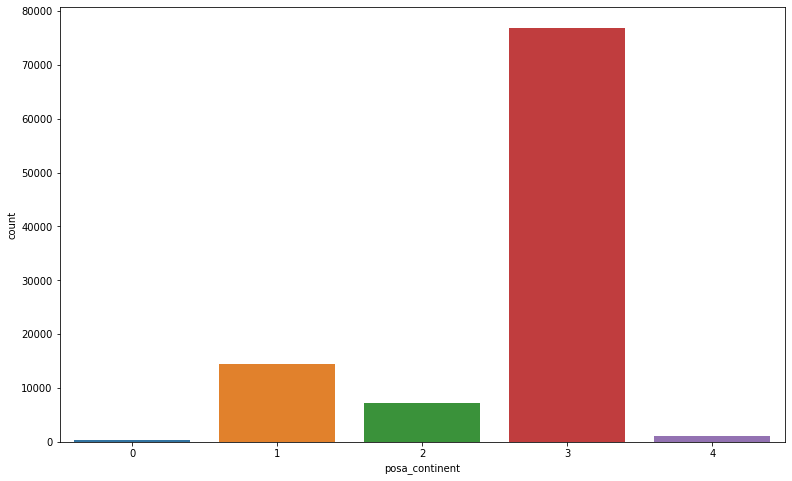

In [14]:
# Frequency of posa continent
# The below bar chart shows that continent 3 has by far the highest count of IDs for the website 
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('posa_continent', data=train_df,order=[0,1,2,3,4],ax=ax);

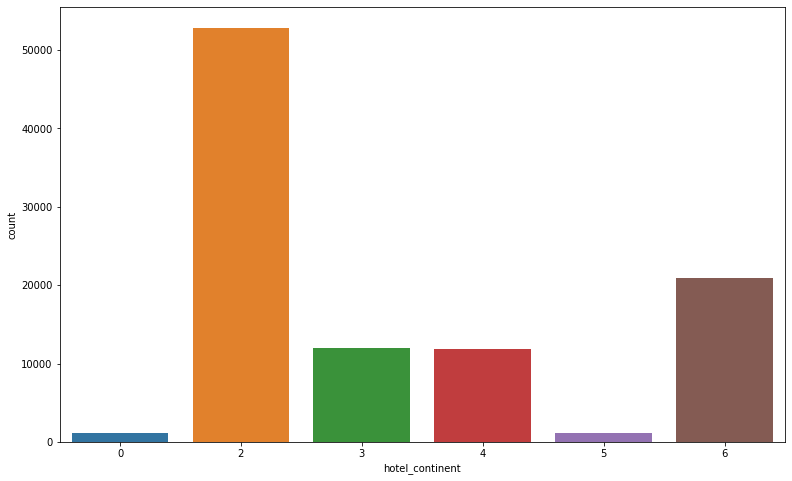

In [15]:
# frequency of hotel continent
# The below bar chart shows that continent 2 has by far the highest count of hotels concentration 
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('hotel_continent', data=train_df,order=[0,2,3,4,5,6],ax=ax);

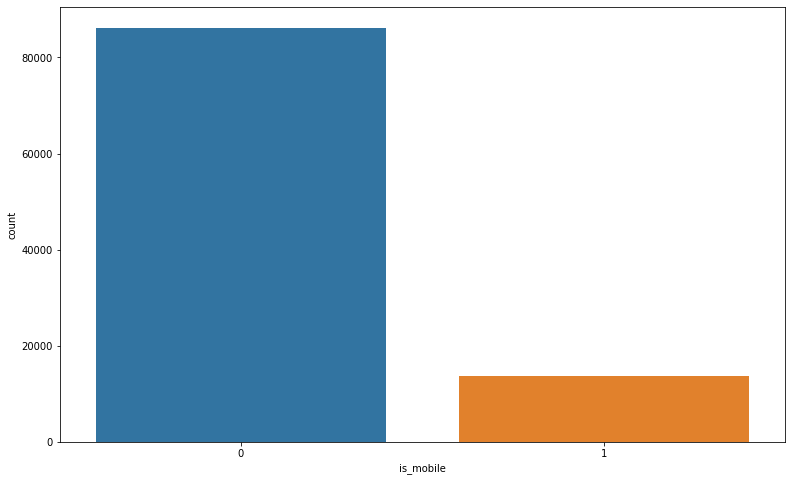

In [16]:
# Frequency of booking through mobile
# The below graph shows that most of the bookings were done from non mobile devices
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_mobile',data=train_df, order=[0,1],ax=ax);

In [17]:
# Here is the numerical output based on the is_mobile data
train_df.groupby('is_mobile')['user_id'].count()

is_mobile
0    86197
1    13803
Name: user_id, dtype: int64

In [18]:
# Function to change the column data types to date time
# Adding some additional attributes
# stay_dur: number of duration of stay
# no_of_days_betw_booking: number of days between the booking
def convert_to_datetime(df):
    df['checkin'] = pd.to_datetime(df['srch_ci'])
    df['checkout'] = pd.to_datetime(df['srch_co'])
    
    df['stay_dur'] = (df['checkout'] - df['checkin']).astype('timedelta64[D]')
    df['no_of_days_betw_booking'] = (df['checkin'] - df['date_time']).astype('timedelta64[D]')

    # From the hotel check-in date extracting
    # Month, Year, Day
    df['checkin_day'] = df["checkin"].apply(lambda x: x.day)
    df['checkin_month'] = df["checkin"].apply(lambda x: x.month)
    df['checkin_year'] = df["checkin"].apply(lambda x: x.year)

In [19]:
# Calling the function and passing the dataframe

convert_to_datetime(train_df)

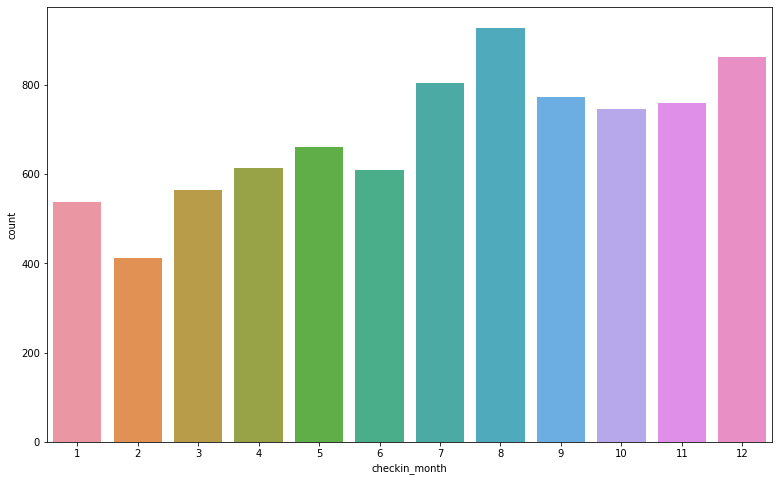

In [20]:
# The below graphs are built using the additional attributes created above
# Count the bookings in each month
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('checkin_month',data=train_df[train_df["is_booking"] == 1],order=list(range(1,13)),ax=ax);

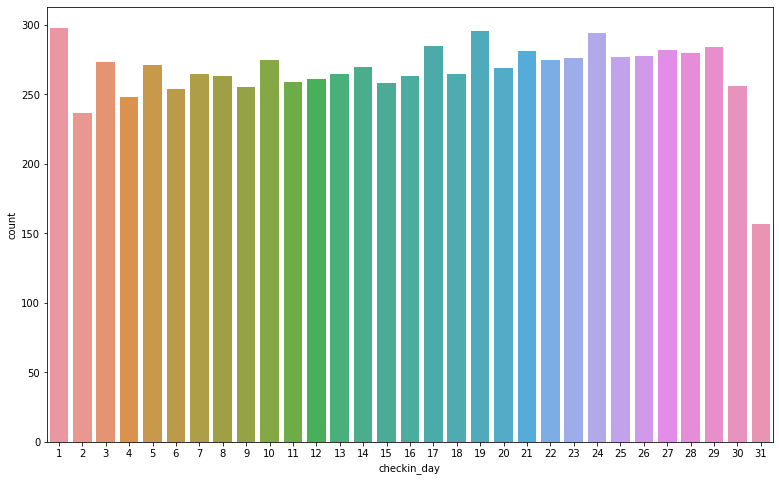

In [21]:
# Count the bookings as per the day
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('checkin_day',data=train_df[train_df["is_booking"] == 1],order=list(range(1,32)),ax=ax);

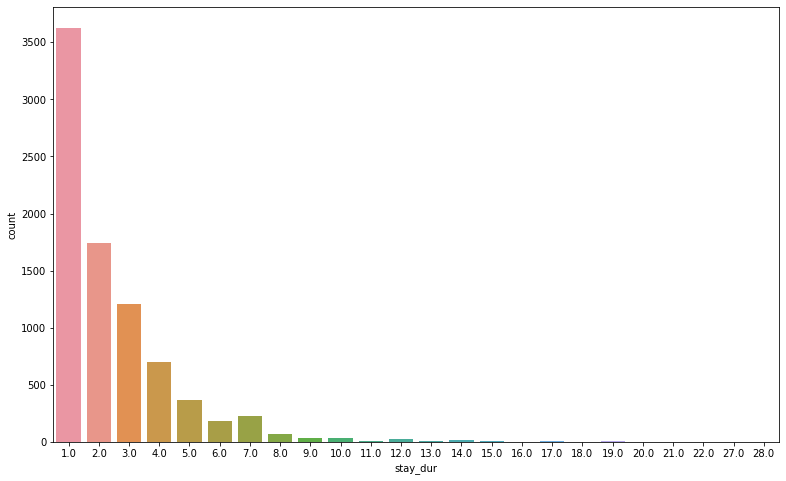

In [22]:
# Count the bookings as per the stay_duration
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('stay_dur',data=train_df[train_df["is_booking"] == 1],ax=ax);

In [23]:
# From the above charts we see some interesting data about the booking patterns
# One interesting thing to look for is that most of the stay duration was 1 day
# This could imply this training set has more business travels
# Showing the top 5 rows of the dataframe
train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,checkin,checkout,stay_dur,no_of_days_betw_booking,checkin_day,checkin_month,checkin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1,2014-08-27,2014-08-31,4.0,15.0,27.0,8.0,2014.0
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1,2014-08-29,2014-09-02,4.0,17.0,29.0,8.0,2014.0
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1,2014-08-29,2014-09-02,4.0,17.0,29.0,8.0,2014.0
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80,2014-11-23,2014-11-28,5.0,105.0,23.0,11.0,2014.0
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21,2014-11-23,2014-11-28,5.0,105.0,23.0,11.0,2014.0


In [24]:
# Inspecting the dataframe post conversion
# 3 new columns are added now
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  100000 non-null  datetime64[ns]
 1   site_name                  100000 non-null  int64         
 2   posa_continent             100000 non-null  int64         
 3   user_location_country      100000 non-null  int64         
 4   user_location_region       100000 non-null  int64         
 5   user_location_city         100000 non-null  int64         
 6   orig_destination_distance  63078 non-null   float64       
 7   user_id                    100000 non-null  int64         
 8   is_mobile                  100000 non-null  int64         
 9   is_package                 100000 non-null  int64         
 10  channel                    100000 non-null  int64         
 11  srch_ci                    99929 non-null   object   

### Model Generation steps

In [25]:
# choosing all the columns that we want as the feature matrix 
# Filtering the dataframe to keep those observations that were booked
# train_df.columns

train_df = train_df[train_df["is_booking"] == 1]
X = train_df[['site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city','user_id', 'is_mobile', 'is_package', 'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market']]


y = train_df[['hotel_cluster']]
print("Feature Matrix dimension: ", X.shape)
print("Target Vector dimension: ", y.shape)

Feature Matrix dimension:  (8270, 18)
Target Vector dimension:  (8270, 1)


In [26]:
# Test Train Split
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(len(X_train))
print(len(X_test))

5789
2481


In [27]:
#ML Algorithm : Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

regressor = LogisticRegression()
# Fitting the training data to our model
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
acc=accuracy_score(y_test,y_predict)

# Accuracy and Confusion matrix

print("Accuracy:" ,acc)
print( "confusion_matrix")
print( confusion_matrix(y_test, y_predict))

# Printing the Classification report
print(classification_report(y_test, y_predict))

# The overall accuracy of the Logistic regression model is only 4%
# This shows that we have to do a lot of feature engineering tasks here and remove some of the unwanted features also.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.03909713825070536
confusion_matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        38
           6       0.00      0.00      0.00        44
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        28
          10       0.00      0.00      0.00        31
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00        34
          14       0.0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# ML algorithm: RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=80)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

acc=accuracy_score(y_test,y_pred)

print("Accuracy:" ,acc)
print( "confusion_matrix")
print( confusion_matrix(y_test, y_pred))

# classification_report

print(classification_report(y_test, y_pred))
print(clf.feature_importances_)

# The overall accuracy of the Random Forect model is better than the Logistic regression model and is only 18.7%

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.19064893188230553
confusion_matrix
[[ 2  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0  7 ...  1  4  0]
 ...
 [ 1  0  1 ...  9  3  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  2 ...  0  0  1]]
              precision    recall  f1-score   support

           0       0.17      0.11      0.13        18
           1       0.26      0.39      0.31        31
           2       0.18      0.17      0.17        42
           3       0.07      0.08      0.08        12
           4       0.16      0.16      0.16        31
           5       0.17      0.11      0.13        38
           6       0.18      0.14      0.16        44
           7       0.16      0.15      0.15        33
           8       0.38      0.29      0.32        21
           9       0.07      0.11      0.09        28
          10       0.32      0.35      0.34        31
          11       0.27      0.16      0.20        25
          12       0.12      0.05      0.07        22
          13       0.27      0.38      0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# reducing some of the features from the feature matrix 
# This did not improve the score very much
# train_df.columns

# X = train_df[['site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city','user_id', 'is_mobile', 'is_package', 'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market']]
X = train_df[['posa_continent', 'user_location_country', 'user_location_region', 'user_location_city','user_id', 'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market']]

y = train_df[['hotel_cluster']]
print("Feature Matrix dimension: ", X.shape)
print("Target Vector dimension: ", y.shape)

Feature Matrix dimension:  (8270, 15)
Target Vector dimension:  (8270, 1)


In [44]:
# Test Train Split
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(len(X_train))
print(len(X_test))

5789
2481


In [45]:
#ML Algorithm : Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

regressor = LogisticRegression()
# Fitting the training data to our model
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
acc=accuracy_score(y_test,y_predict)

# Accuracy and Confusion matrix

print("Accuracy:" ,acc)
print( "confusion_matrix")
print( confusion_matrix(y_test, y_predict))

# Printing the Classification report
print(classification_report(y_test, y_predict))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.03909713825070536
confusion_matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        38
           6       0.00      0.00      0.00        44
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        28
          10       0.00      0.00      0.00        31
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00        34
          14       0.0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# ML algorithm: RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=80)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

acc=accuracy_score(y_test,y_pred)

print("Accuracy:" ,acc)
print( "confusion_matrix")
print( confusion_matrix(y_test, y_pred))

# classification_report

print(classification_report(y_test, y_pred))
print(clf.feature_importances_)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.18460298266827893
confusion_matrix
[[ 2  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0  8 ...  2  4  0]
 ...
 [ 1  0  1 ...  8  3  0]
 [ 1  0  0 ...  0  6  0]
 [ 0  0  1 ...  0  0  1]]
              precision    recall  f1-score   support

           0       0.13      0.11      0.12        18
           1       0.22      0.35      0.27        31
           2       0.20      0.19      0.20        42
           3       0.06      0.08      0.07        12
           4       0.17      0.16      0.16        31
           5       0.17      0.11      0.13        38
           6       0.17      0.14      0.15        44
           7       0.18      0.18      0.18        33
           8       0.58      0.33      0.42        21
           9       0.07      0.11      0.09        28
          10       0.28      0.32      0.30        31
          11       0.20      0.12      0.15        25
          12       0.09      0.05      0.06        22
          13       0.28      0.35      0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
